In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob


In [248]:
MCACapacity = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/Results/MCACapacity.csv")
MCACapacity

,technology,dst_region,region,agent,sector,type,year,capacity
0,Biomass Power Plant,Kenya,Kenya,A1,power,retrofit,2020,2.7864
1,Geothermal Power Plant,Kenya,Kenya,A1,power,retrofit,2020,12.9722
2,Large Hydropower Plant (Dam) (>100MW),Kenya,Kenya,A1,power,retrofit,2020,15.4490
3,Light Fuel Oil Power Plant,Kenya,Kenya,A1,power,retrofit,2020,8.9010
4,Medium Hydropower Plant (10-100MW),Kenya,Kenya,A1,power,retrofit,2020,7.7028
...,...,...,...,...,...,...,...,...
84,Small Hydropower Plant (<10MW),Kenya,Kenya,A1,power,retrofit,2040,189.2160
85,Solar PV (Distributed with Storage),Kenya,Kenya,A1,power,retrofit,2040,2501.1787
86,Solar PV (Utility),Kenya,Kenya,A1,power,retrofit,2040,2500.7476
87,Crude Oil Refinery Option 1,Kenya,Kenya,A1,oil,retrofit,2040,2624.9999


In [249]:
MCACapacity_summed = MCACapacity.groupby(["technology", "sector", "year"]).sum().reset_index()
MCACapacity_summed

,technology,sector,year,capacity
0,Biomass Power Plant,power,2020,2.7864
1,Biomass Power Plant,power,2025,2503.4830
2,Biomass Power Plant,power,2030,2503.2322
3,Biomass Power Plant,power,2035,2503.0065
4,Biomass Power Plant,power,2040,2502.8034
...,...,...,...,...
84,Solar PV (Utility),power,2020,0.7430
85,Solar PV (Utility),power,2025,2500.9288
86,Solar PV (Utility),power,2030,2500.8619
87,Solar PV (Utility),power,2035,2500.8017


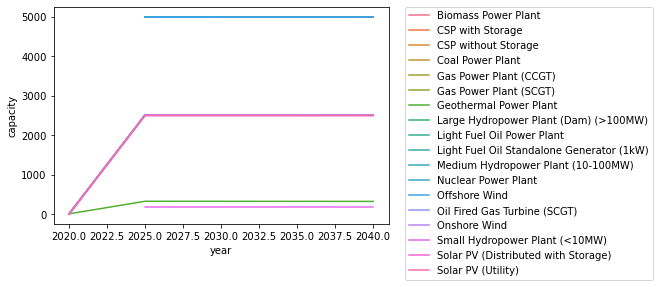

In [250]:
sns.lineplot(data=MCACapacity_summed[(MCACapacity_summed.sector=="power")], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

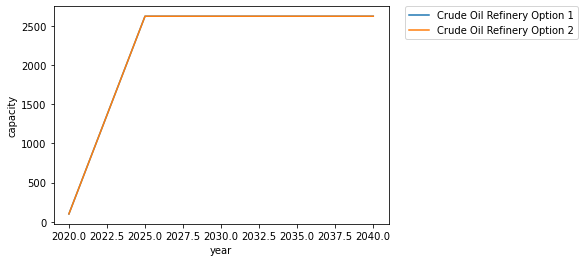

In [251]:
sns.lineplot(data=MCACapacity_summed[MCACapacity_summed.sector=="oil"], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [252]:
prices = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/Results/MCAPrices.csv")
prices

,timeslice,commodity,region,prices,year
0,"('all-year', 'all-week', 'night')",crude_oil,Kenya,12.2000,2020
1,"('all-year', 'all-week', 'night')",biomass,Kenya,1.7600,2020
2,"('all-year', 'all-week', 'night')",coal,Kenya,5.1000,2020
3,"('all-year', 'all-week', 'night')",lfo,Kenya,14.7500,2020
4,"('all-year', 'all-week', 'night')",hfo,Kenya,8.8700,2020
...,...,...,...,...,...
235,"('all-year', 'all-week', 'evening')",lfo,Kenya,10.9571,2040
236,"('all-year', 'all-week', 'evening')",hfo,Kenya,10.9571,2040
237,"('all-year', 'all-week', 'evening')",gas,Kenya,11.0000,2040
238,"('all-year', 'all-week', 'evening')",CO2f,Kenya,0.6561,2040


In [253]:
prices_summed = prices.groupby(["commodity","year"]).mean("prices").reset_index()
prices_summed

,commodity,year,prices
0,CO2f,2020,1.0000
1,CO2f,2025,0.9000
2,CO2f,2030,0.8100
3,CO2f,2035,0.7290
4,CO2f,2040,0.6561
5,biomass,2020,1.7600
6,biomass,2025,1.7600
7,biomass,2030,1.7600
8,biomass,2035,1.7600
9,biomass,2040,1.7600


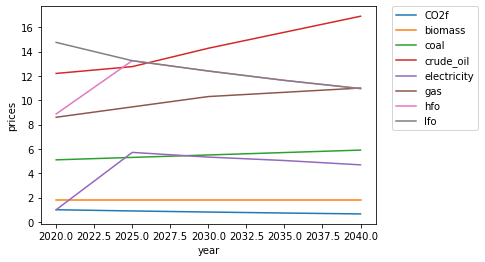

In [254]:
sns.lineplot(data=prices_summed, x="year", y="prices", hue="commodity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Supply

In [255]:
path = "/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/Results/Power/Supply/"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['file'] = filename.split("/")[-1].split(".")[0]
    li.append(df)

supply = pd.concat(li, axis=0, ignore_index=True)
supply


,Unnamed: 0,commodity,region,technology,year,supply,file
0,0,CO2f,Kenya,Biomass Power Plant,2040,4227.9760,2040
1,1,CO2f,Kenya,Coal Power Plant,2040,13583.6298,2040
2,2,CO2f,Kenya,Gas Power Plant (CCGT),2040,8055.4083,2040
3,3,CO2f,Kenya,Gas Power Plant (SCGT),2040,8055.4083,2040
4,4,CO2f,Kenya,Biomass Power Plant,2045,5093.8229,2040
...,...,...,...,...,...,...,...
262,38,electricity,Kenya,Oil Fired Gas Turbine (SCGT),2035,54.0506,2030
263,39,electricity,Kenya,Onshore Wind,2035,14.1625,2030
264,40,electricity,Kenya,Small Hydropower Plant (<10MW),2035,2.4400,2030
265,41,electricity,Kenya,Solar PV (Distributed with Storage),2035,21.5027,2030


In [256]:
electricity_supply = supply[supply.commodity=="electricity"]
electricity_supply

,Unnamed: 0,commodity,region,technology,year,supply,file
8,8,electricity,Kenya,Biomass Power Plant,2040,42.2798,2040
9,9,electricity,Kenya,CSP with Storage,2040,76.0183,2040
10,10,electricity,Kenya,CSP without Storage,2040,76.0183,2040
11,11,electricity,Kenya,Coal Power Plant,2040,143.5902,2040
12,12,electricity,Kenya,Gas Power Plant (CCGT),2040,143.5902,2040
...,...,...,...,...,...,...,...
262,38,electricity,Kenya,Oil Fired Gas Turbine (SCGT),2035,54.0506,2030
263,39,electricity,Kenya,Onshore Wind,2035,14.1625,2030
264,40,electricity,Kenya,Small Hydropower Plant (<10MW),2035,2.4400,2030
265,41,electricity,Kenya,Solar PV (Distributed with Storage),2035,21.5027,2030


In [257]:
elec_summed = electricity_supply.groupby(["commodity", "region", "technology", "year"]).sum().reset_index()
elec_summed 

,commodity,region,technology,year,Unnamed: 0,supply
0,electricity,Kenya,Biomass Power Plant,2020,5,1.3932
1,electricity,Kenya,Biomass Power Plant,2025,22,31.2298
2,electricity,Kenya,Biomass Power Plant,2030,34,47.8120
3,electricity,Kenya,Biomass Power Plant,2035,34,67.2428
4,electricity,Kenya,Biomass Power Plant,2040,33,84.5596
...,...,...,...,...,...,...
109,electricity,Kenya,Solar PV (Utility),2030,68,30.5708
110,electricity,Kenya,Solar PV (Utility),2035,66,42.9976
111,electricity,Kenya,Solar PV (Utility),2040,65,54.0736
112,electricity,Kenya,Solar PV (Utility),2045,64,65.1508


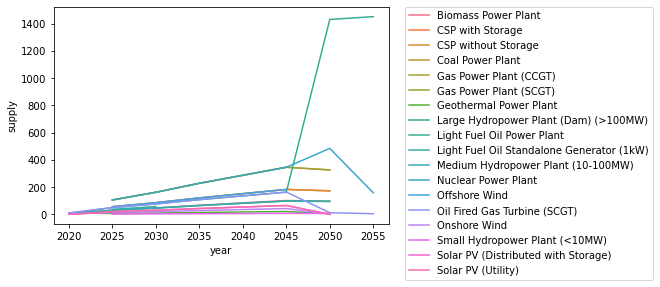

In [258]:
sns.lineplot(data=elec_summed, x="year", y="supply", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)